# Portuguese banking institution
## Introduction
- Term Deposits are a major source of income for a bank.
- A term deposit is a cash investment held at a financial institution.
- Your money is invested for an agreed rate of interest over a fixed amount of time, orterm.
- The bank has various outreach plans to sell term deposits to their customers such as:
  -- Email Marketing
  -- Advertisements
  -- Telephonic Marketing
  -- Digital Marketing
## Problem Statement
- Telephonic marketing campaigns still remain one of the most effective way to reach out to people.
- Telephonic marketing require huge investment as large call centers are hired to actually execute these campaigns.
- Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
## Objective
The goal is to predict if the client will subscribe to a term deposit (variable y)
## Data Understanding
- The data is related to the direct marketing campaigns of a Portuguese banking institution.
- The marketing campaigns were based on phone calls.
- Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.
- Missing Attribute Values: None
- From May 2008 to November 2010

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetching data

In [2]:
df = pd.read_excel('TermDeposit.xlsx')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Field descriptions:
- age(numeric)
- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default?(binary:yes or no)
- balance: average yearly balance, in euros(numeric)
- housing: has housing loan?(binary:yes or no)
- loan: has personal loan?(binary:yes or no)

### related with the last contact of the current campaign
- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
- y: has the client subscribed a term deposit? (binary: "yes","no")

# Data Cleaning and Preprocessing 

In [4]:
df.isnull().sum() #No Null entries

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df[df.duplicated()] #No duplicate rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [8]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Checking value count of Target variable

In [9]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='percent'>

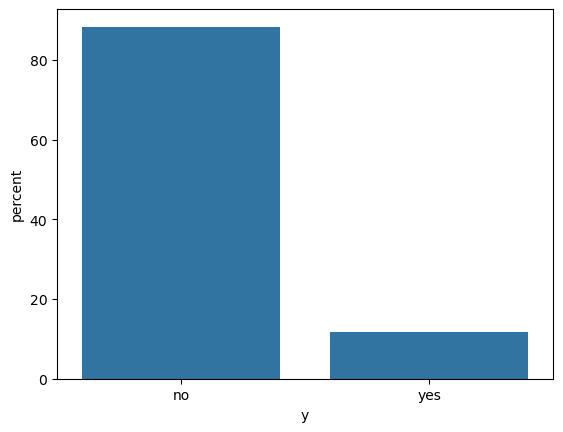

In [10]:
sns.countplot(x=df['y'],stat='percent')

- 88% of customers do not subscribe to the Term Deposit, leaving only approximately 12% who do subscribe.
- This situation involves imbalanced data.

### age

<Axes: xlabel='age', ylabel='Count'>

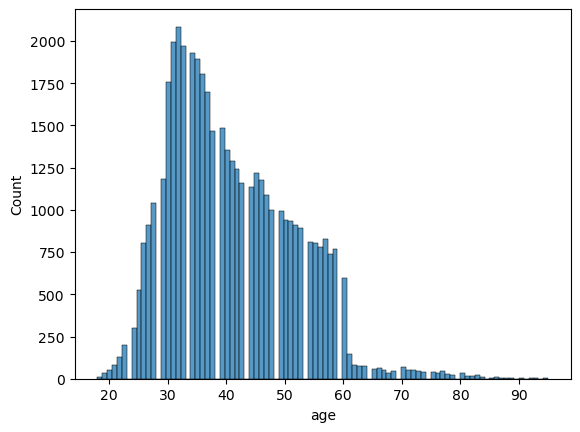

In [11]:
sns.histplot(df.age)

In [12]:
df[(df.age==34) & (df.y=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
474,34,admin.,married,secondary,no,869,no,no,unknown,6,may,1677,1,-1,0,unknown,yes
2404,34,blue-collar,divorced,secondary,no,383,yes,no,unknown,13,may,2231,1,-1,0,unknown,yes
4035,34,blue-collar,married,primary,no,695,yes,yes,unknown,16,may,1064,4,-1,0,unknown,yes
4607,34,technician,single,secondary,no,85,yes,no,unknown,20,may,1182,4,-1,0,unknown,yes
4818,34,blue-collar,married,secondary,no,1207,yes,no,unknown,21,may,905,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45040,34,technician,married,secondary,no,159,yes,no,cellular,18,oct,252,1,-1,0,unknown,yes
45081,34,technician,single,secondary,no,1279,yes,no,cellular,21,oct,339,3,91,10,success,yes
45178,34,blue-collar,married,secondary,no,320,yes,no,cellular,12,nov,413,1,92,3,success,yes
45182,34,technician,married,secondary,no,133,no,no,cellular,15,nov,401,2,187,5,success,yes


- Customers of age lying between 30 years to 40 years were contacted the most

### pdays

In [13]:
print(df.pdays.value_counts())
print()
f"{(sum(df.pdays==-1)/df.shape[0])*100:0.2f}%"

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64



'81.74%'

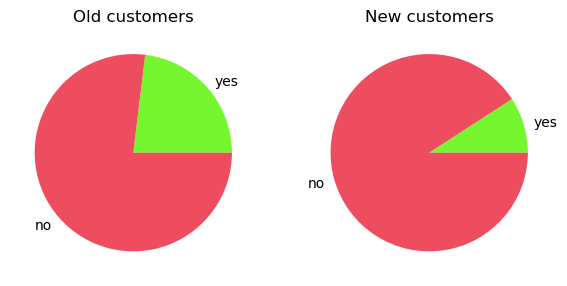

In [14]:
fig = plt.figure(figsize=(7, 5))
fig.add_subplot(1, 2, 1)
plt.pie([1905,6352],labels=['yes','no'],colors=['#75f62e','#ed4d5e'])
plt.title('Old customers')

fig.add_subplot(1, 2, 2)
plt.pie([3384,33570],labels=['yes','no'],colors=['#75f62e','#ed4d5e'])
plt.title('New customers')
plt.show()

- The majority of customers had not received prior contact, indicating that they are new to the customer base.
- 81.74% of customers had not been contacted before.
- Previously contacted customers exhibit a higher subscription rate to the Term Deposit compared to those who have not been contacted before.

### loan,housing loan

In [15]:
data={'Total_no_ppl':[20763,2877,4367,17204],'Yes':[1670,219,265,3135],'No':[19093,2658,4102,14069],'Yes_perc':[8.04,7.61,6.06,18.22],'No_perc':[91.95,92.38,93.93,81.77]}
pd.DataFrame(data ,index=['House_loan','Personal_loan','Both_loan','No_loan'],columns=['Total_no_ppl','Yes','No','Yes_perc','No_perc'])

,Total_no_ppl,Yes,No,Yes_perc,No_perc
House_loan,20763,1670,19093,8.04,91.95
Personal_loan,2877,219,2658,7.61,92.38
Both_loan,4367,265,4102,6.06,93.93
No_loan,17204,3135,14069,18.22,81.77


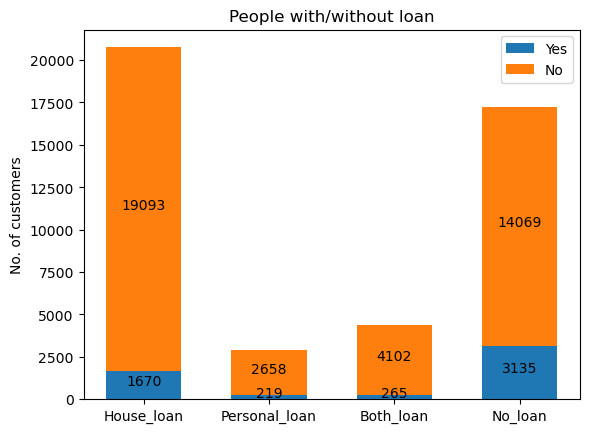

In [16]:
loan =['House_loan','Personal_loan','Both_loan','No_loan']
data={'Yes':[1670,219,265,3135],'No':[19093,2658,4102,14069]}
width =0.6

fig,ax = plt.subplots()
bottom = np.zeros(4)

for y,y_count in data.items():
    p = ax.bar(loan,y_count,width,label=y,bottom=bottom)
    bottom += y_count
    ax.bar_label(p,label_type='center',padding=3)

ax.set_title('People with/without loan')
ax.legend()
plt.ylabel("No. of customers")
plt.show()

- Around 46% customers have House loan(only), 6% have Personal loan(only),9% have both the loan and 38% have got no loan
- More people with *No loan* take up the Term Deposit compared to people who have got loan

### balance

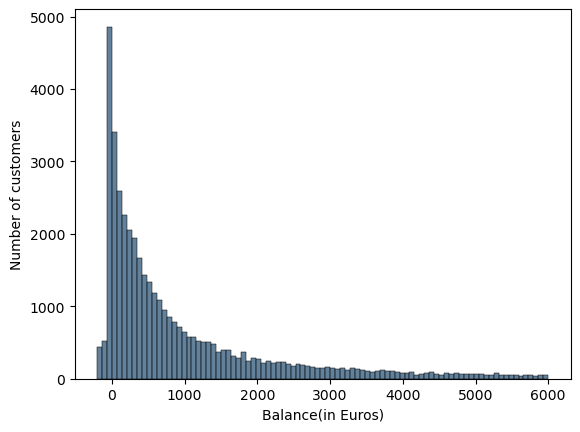

In [17]:
sns.histplot(x=df.balance,stat='count',binrange=(-200,6000),color='#30577a')
plt.xlabel('Balance(in Euros)')
plt.ylabel('Number of customers')
plt.show()

**The maximum number of customers contacted had balances ranging from negative amounts to 1000 euros**

### duration

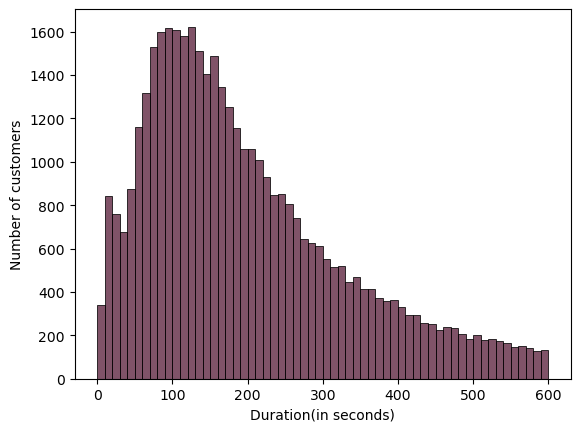

In [18]:
sns.histplot(x=df.duration,stat='count',binrange=(0,600),color='#551936')
plt.xlabel('Duration(in seconds)')
plt.ylabel('Number of customers')
plt.show()

<Axes: xlabel='duration'>

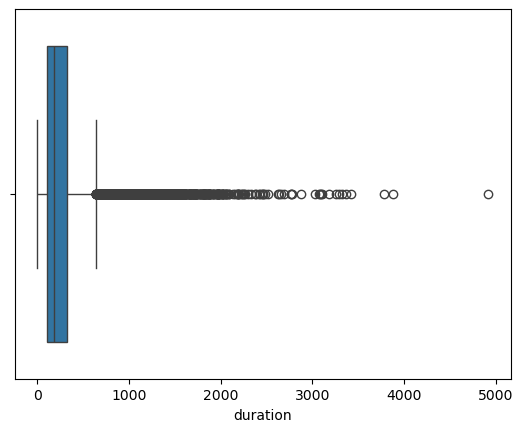

In [19]:
sns.boxplot(x=df.duration)

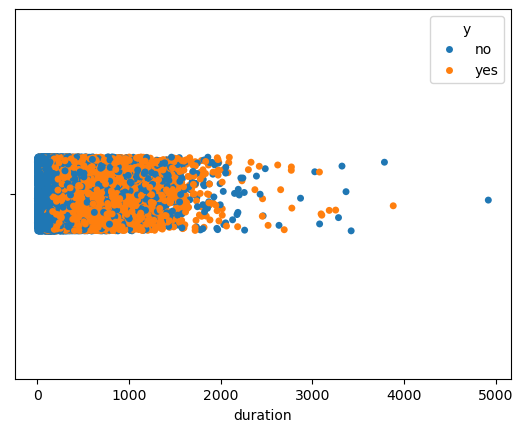

In [20]:
sns.stripplot(x='duration',data=df,hue='y')
plt.show()

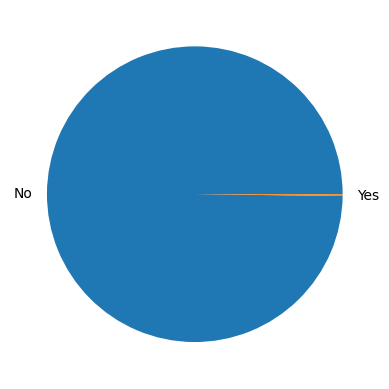

In [21]:
plt.pie([len(df[(df.duration<60)&(df.y=='no')]),len(df[(df.duration<60)&(df.y=='yes')])],labels=['No','Yes'])
plt.show()

- Talking with customer less than 1 minute => they dont subscribe for the Term Deposit
- Roughly half of the customers were contacted for a duration spanning from 60 seconds to 200 seconds.

### campaign

<Axes: xlabel='campaign'>

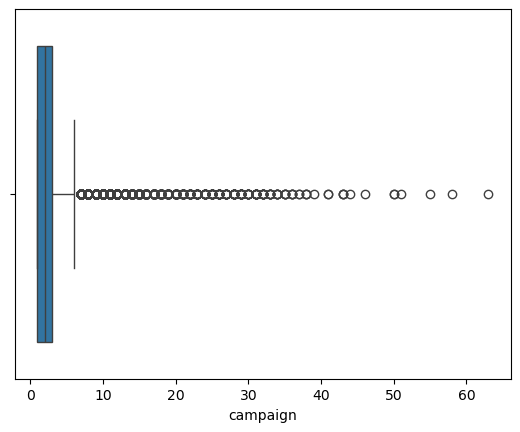

In [22]:
sns.boxplot(x=df.campaign)

Text(0.5, 0, 'Number of contacts in this campaign')

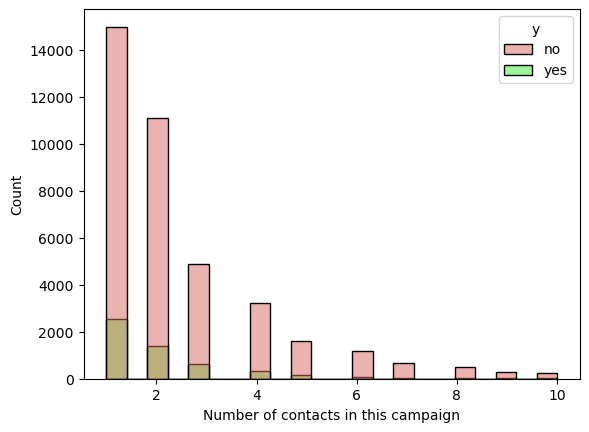

In [23]:
sns.histplot(x=df.campaign,binrange=(1,10),hue=df.y,palette=['#d86961','#41ee33'],binwidth=0.4)
plt.xlabel("Number of contacts in this campaign")

In [24]:
print(f"{len(df[(df.campaign<=2)])*100/df.shape[0]:.1f} % ")

66.5 % 


In [25]:
print(f"{len(df[(df.campaign<=2)&(df.y=='yes')])*100/len(df[df.y=='yes']):0.1f}%")

74.9%


- Around 66.5% of customers were contacted once or twice during the campaign, including the final contact.
- Among these 66.5% of customers, 74.9% who subscribed to the term deposit are included.

### previous

<Axes: xlabel='previous'>

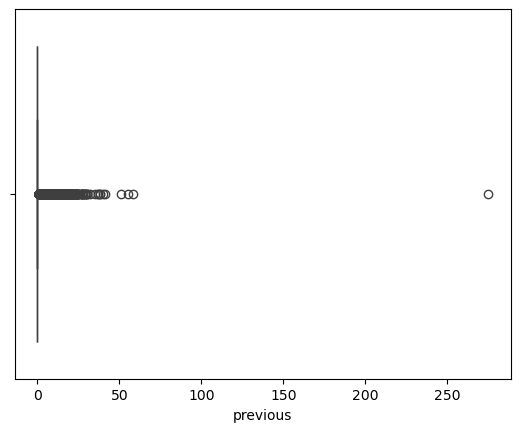

In [26]:
sns.boxplot(x=df.previous)

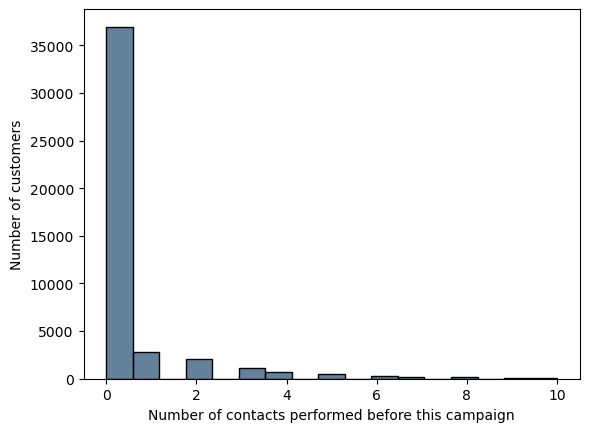

In [27]:
sns.histplot(x=df.previous,stat='count',binrange=(0,10),color='#30577a')
plt.xlabel('Number of contacts performed before this campaign')
plt.ylabel('Number of customers')
plt.show()

In [28]:
f"{df.previous.value_counts()[0]*100/df.shape[0]:.1f}%"

'81.7%'

**Most of the customers are new as there is almost 80% of customers who have not been contacted before**

<Axes: xlabel='previous', ylabel='Count'>

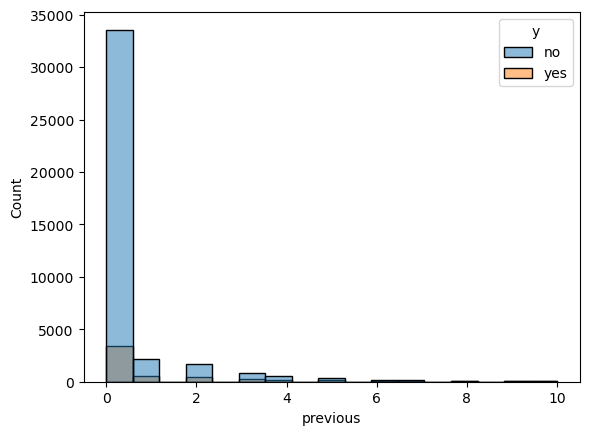

In [29]:
sns.histplot(x=df['previous'],hue=df['y'],binrange=(0,10))

### poutcome

In [30]:
df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

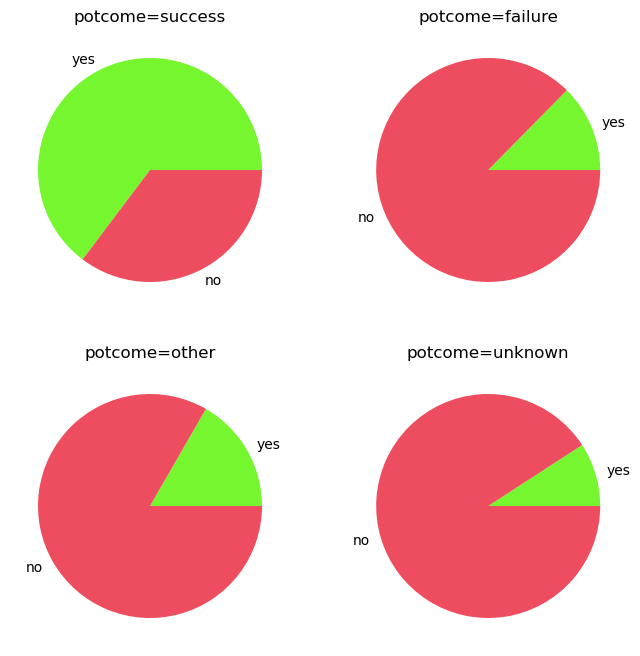

In [31]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(2, 2, 1)
plt.pie([978,533],labels=['yes','no'],colors=['#75f62e','#ed4d5e'])
plt.title('potcome=success')

fig.add_subplot(2, 2, 2)
plt.pie([618,4283],labels=['yes','no'],colors=['#75f62e','#ed4d5e'])
plt.title('potcome=failure')

fig.add_subplot(2, 2, 3)
plt.pie([307,1533],labels=['yes','no'],colors=['#75f62e','#ed4d5e'])
plt.title('potcome=other')

fig.add_subplot(2, 2, 4)
plt.pie([3386,33573],labels=['yes','no'],colors=['#75f62e','#ed4d5e'])
plt.title('potcome=unknown')
plt.show()

**There are high chances of customers subscribing the Term Deposit if the outcome of the previous marketing campaign was "success"**

### day

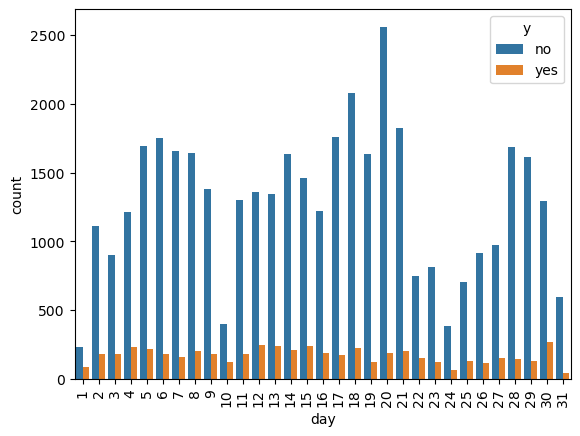

In [32]:
sns.countplot(x=df['day'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

# Data Visualization

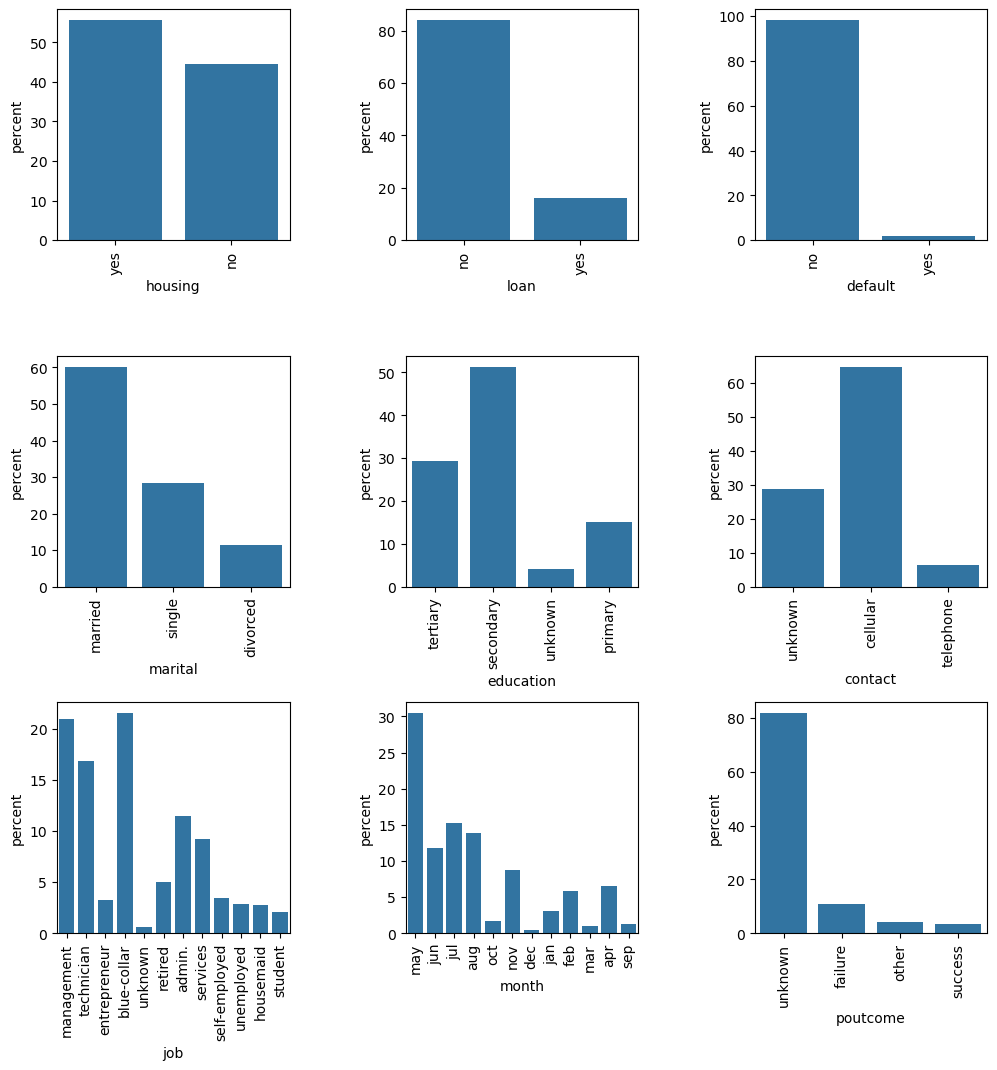

In [33]:
a=['housing','loan','default','marital','education','contact','job','month','poutcome']
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(len(a)):
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.countplot(x=df[a[i]],stat='percent')

 1. The customers contacted exhibited various job roles, with the highest number being in the blue-collar category.
 2. The maximum number of customers contacted possessed a secondary education qualification.
 3. Most of the customers were contacted in the month of "May"
 4. Largest percentage of customers were contacted through "cellular" mode
 5. Most of the customers contacted are "married"

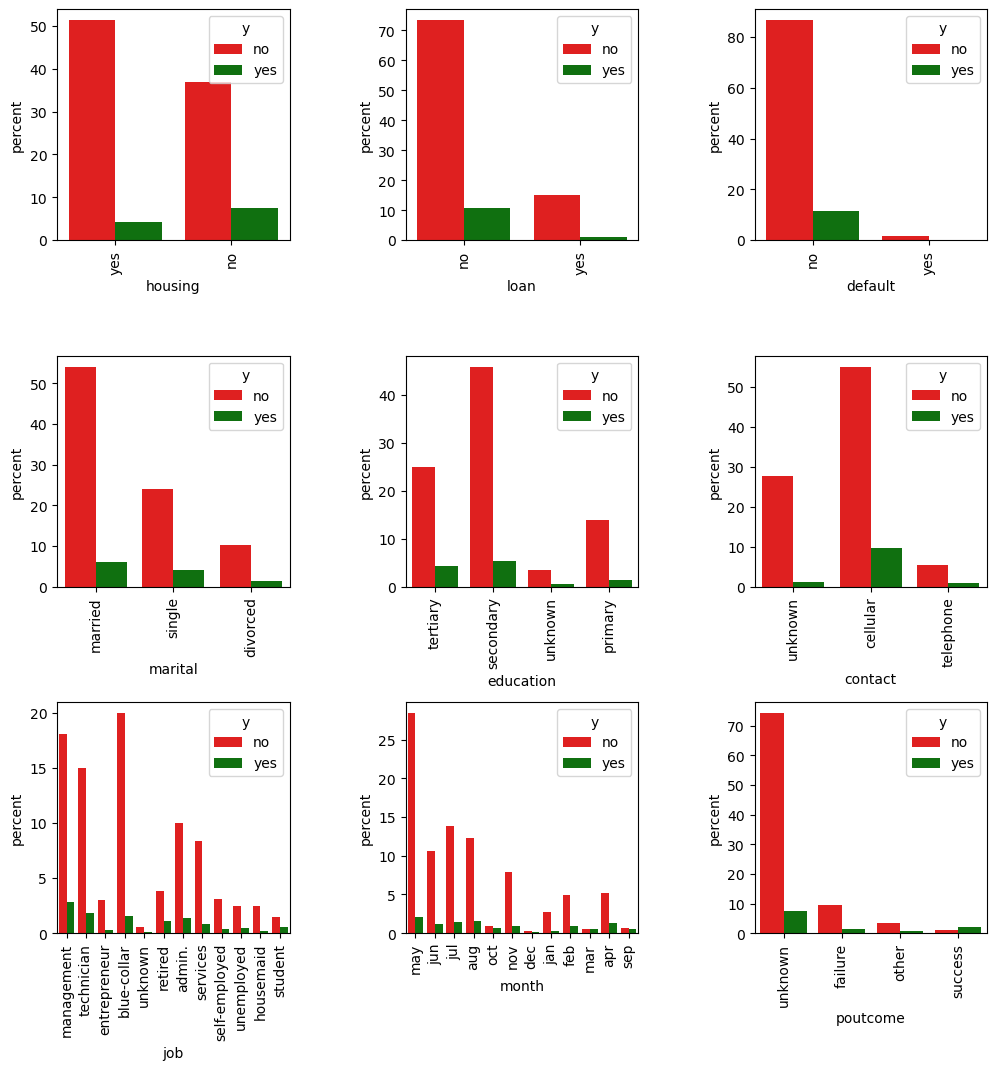

In [34]:
a=['housing','loan','default','marital','education','contact','job','month','poutcome']
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(len(a)):
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.countplot(x=df[a[i]],hue=df['y'],stat='percent',palette=["#ff0000", "#008000"])

1. Single or divorced/widowed customers exhibit a higher subscription rate to term deposits compared to married ones among those contacted.
2. The month of May saw the highest number of customer contacts, resulting in the highest number of term deposit subscriptions during that period.
3. Among the customers contacted with various job roles, those in management roles subscribed the most for the term deposit.
4. Among all job roles, the highest percentage of customers contacted, who were students, subscribed to the term deposit.
5. The highest percentage of customers contacted with tertiary education subscribed to the term deposit among all education qualifications.
6. The education level with the lowest percentage of customers contacted who subscribed to the term deposit is primary education.
7. Approximately 50% of the customers contacted in the months of March, September, and December subscribed to the term deposit.
8. The majority of customers were contacted via cellular communication, and among those contacted through this medium, the highest number subscribed to the term deposit.

In [35]:
#1.
def marital_wise_no(df):
    maritals  = df.marital.unique() #array
    for i in maritals:
        total = len(df[df['marital']== i])
        total_yes = len(df[(df['marital']==i) & (df['y']=='yes')])
        total_no = len(df[(df['marital']==i) & (df['y']=='no')])
        print("The Number of customers with marital " + '\033[1m' +f"{i}" + '\033[0m' +f", Yes:{(total_yes*100)/total:.2f}%, No:{(total_no*100)/total:.2f}%")
        print()
marital_wise_no(df)

The Number of customers with marital married, Yes:10.12%, No:89.88%

The Number of customers with marital single, Yes:14.95%, No:85.05%

The Number of customers with marital divorced, Yes:11.95%, No:88.05%



In [36]:
#3.
def job_wise_no(df):
    jobs  = df.job.unique() #array
    for i in jobs:
        total = len(df[df['job']== i])
        total_yes = len(df[(df['job']==i) & (df['y']=='yes')])
        total_no = len(df[(df['job']==i) & (df['y']=='no')])
        print("The Number of customers with job " + '\033[1m' +f"{i}" + '\033[0m' +f", Yes:{(total_yes)}, No:{(total_no)}")
        print()
job_wise_no(df)

The Number of customers with job management, Yes:1301, No:8157

The Number of customers with job technician, Yes:840, No:6757

The Number of customers with job entrepreneur, Yes:123, No:1364

The Number of customers with job blue-collar, Yes:708, No:9024

The Number of customers with job unknown, Yes:34, No:254

The Number of customers with job retired, Yes:516, No:1748

The Number of customers with job admin., Yes:631, No:4540

The Number of customers with job services, Yes:369, No:3785

The Number of customers with job self-employed, Yes:187, No:1392

The Number of customers with job unemployed, Yes:202, No:1101

The Number of customers with job housemaid, Yes:109, No:1131

The Number of customers with job student, Yes:269, No:669



In [37]:
#4.
def job_wise_contact_perc(df):
    jobs  = df.job.unique() #array
    for i in jobs:
        total = len(df[df['job']== i])
        total_yes = len(df[(df['job']==i) & (df['y']=='yes')])
        total_no = len(df[(df['job']==i) & (df['y']=='no')])
        print("The percentage of customers with job "+ '\033[1m' +f"{i}" + '\033[0m'+ f", Yes:{(total_yes*100)/total:.2f}%, No:{(total_no*100)/total:.2f}%")
        print()
job_wise_contact_perc(df)

The percentage of customers with job management, Yes:13.76%, No:86.24%

The percentage of customers with job technician, Yes:11.06%, No:88.94%

The percentage of customers with job entrepreneur, Yes:8.27%, No:91.73%

The percentage of customers with job blue-collar, Yes:7.27%, No:92.73%

The percentage of customers with job unknown, Yes:11.81%, No:88.19%

The percentage of customers with job retired, Yes:22.79%, No:77.21%

The percentage of customers with job admin., Yes:12.20%, No:87.80%

The percentage of customers with job services, Yes:8.88%, No:91.12%

The percentage of customers with job self-employed, Yes:11.84%, No:88.16%

The percentage of customers with job unemployed, Yes:15.50%, No:84.50%

The percentage of customers with job housemaid, Yes:8.79%, No:91.21%

The percentage of customers with job student, Yes:28.68%, No:71.32%



In [38]:
#5. and 6.
def education_wise(df):
    educations  = df.education.unique() #array
    for i in educations:
        total = len(df[df['education']== i])
        total_yes = len(df[(df['education']==i) & (df['y']=='yes')])
        total_no = len(df[(df['education']==i) & (df['y']=='no')])
        print("The percentage of customers with education "+ '\033[1m' +f"{i}" + '\033[0m'+ f", Yes:{(total_yes*100)/total:.2f}%, No:{(total_no*100)/total:.2f}%")
        print()
education_wise(df)

The percentage of customers with education tertiary, Yes:15.01%, No:84.99%

The percentage of customers with education secondary, Yes:10.56%, No:89.44%

The percentage of customers with education unknown, Yes:13.57%, No:86.43%

The percentage of customers with education primary, Yes:8.63%, No:91.37%



In [39]:
#7.
def month_wise(df):
    months  = df.month.unique() #array
    for i in months:
        total = len(df[df['month']== i])
        total_yes = len(df[(df['month']==i) & (df['y']=='yes')])
        total_no = len(df[(df['month']==i) & (df['y']=='no')])
        y = f'{(total_yes*100)/total:.2f}'
        n = f'{(total_no*100)/total:.2f}'
        print(f"The percentage of customers in month "+ '\033[1m' +f"{i}" + '\033[0m'+ f", Yes:{y}%, No:{n}%, Difference:{abs(float(y)-float(n)):.2f}")
        print()
month_wise(df)

The percentage of customers in month may, Yes:6.72%, No:93.28%, Difference:86.56

The percentage of customers in month jun, Yes:10.22%, No:89.78%, Difference:79.56

The percentage of customers in month jul, Yes:9.09%, No:90.91%, Difference:81.82

The percentage of customers in month aug, Yes:11.01%, No:88.99%, Difference:77.98

The percentage of customers in month oct, Yes:43.77%, No:56.23%, Difference:12.46

The percentage of customers in month nov, Yes:10.15%, No:89.85%, Difference:79.70

The percentage of customers in month dec, Yes:46.73%, No:53.27%, Difference:6.54

The percentage of customers in month jan, Yes:10.12%, No:89.88%, Difference:79.76

The percentage of customers in month feb, Yes:16.65%, No:83.35%, Difference:66.70

The percentage of customers in month mar, Yes:51.99%, No:48.01%, Difference:3.98

The percentage of customers in month apr, Yes:19.68%, No:80.32%, Difference:60.64

The percentage of customers in month sep, Yes:46.46%, No:53.54%, Difference:7.08



In [40]:
df.select_dtypes('int')

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


<Axes: >

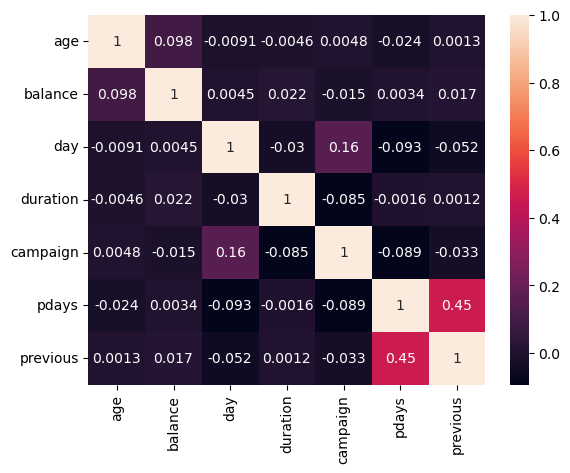

In [41]:
sns.heatmap(data =df.select_dtypes('int').corr(),annot=True)

***"pdays" and "previous" columns of the dataframe are correlated***

<Axes: xlabel='education', ylabel='job'>

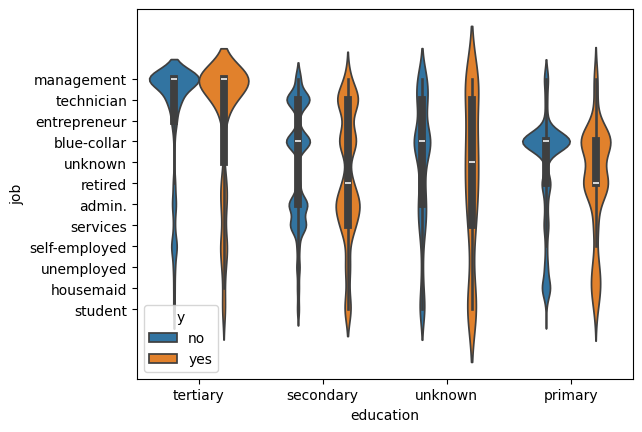

In [42]:
sns.violinplot(x='education',y='job',data=df, hue='y')

# Feature Engineering

### Adding loan feature extracted from the "housing" and "loan" column

In [43]:
def loan_no_loan(df):
    loan_no_loan = np.zeros(df.shape[0])
    if ((df.loan=='no') & (df.housing=='no')):
        return 1
    elif (df.loan=='yes') & (df.housing=='no'):
        return 2
    elif (df.loan=='no') & (df.housing=='yes'):
        return 3
    elif (df.loan=='yes') & (df.housing=='yes'):
        return 4
df['loan_no_loan'] = df.apply(loan_no_loan,axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,loan_no_loan
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,3
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,4
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


### Adding age_group feature extracted from the "age" column

In [44]:
conditions = [(df.age<=25),((df.age>25)&(df.age<45)),((df.age>=45)&(df.age<60)),(df.age>=60)]
choices = ['Young_adult','Adult','Middle_age','Old_age']
df['age_group'] =  np.select(conditions,choices)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,loan_no_loan,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,3,Middle_age
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3,Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,4,Adult
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3,Middle_age
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,Adult


<Axes: xlabel='age_group', ylabel='count'>

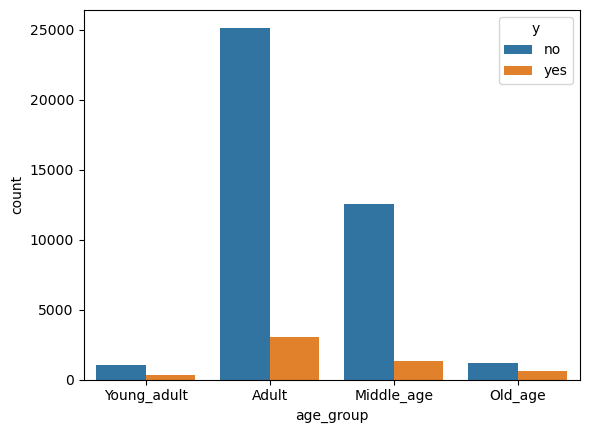

In [45]:
sns.countplot(data=df,x='age_group',hue='y',order=['Young_adult','Adult','Middle_age','Old_age'])

In [46]:
def age_category(df):
    age_groups  = df.age_group.unique() #array
    for i in age_groups:
        total = len(df[df['age_group']== i])
        total_yes = len(df[(df['age_group']==i) & (df['y']=='yes')])
        total_no = len(df[(df['age_group']==i) & (df['y']=='no')])
        print(f"The percentage of customers with age group "+ '\033[1m' +f"{i}" + '\033[0m'+ f", Yes:{(total_yes*100)/total:.2f}%, No:{(total_no*100)/total:.2f}%")
        print()
age_category(df)

The percentage of customers with age group Middle_age, Yes:9.40%, No:90.60%

The percentage of customers with age group Adult, Yes:10.86%, No:89.14%

The percentage of customers with age group Old_age, Yes:33.63%, No:66.37%

The percentage of customers with age group Young_adult, Yes:23.95%, No:76.05%



- The adult age group (between 25 to 45 years) comprised the highest number of customers contacted, and similarly, the majority of customers who subscribed to the term deposit also fell within this age group.
- Among all age groups, the highest percentage of customers contacted in the old age group (above 60 years) subscribed to the term deposit.

### Adding balance_group feature extracted from the "balance" column

In [47]:
conditions = [(df.balance<0),((df.balance>=0)&(df.balance<1001)),((df.balance>=1001)&(df.balance<5001)),((df.balance>=5001)&(df.balance<20001)),(df.balance>=20001)]
choices = ['Negative','Low','Moderate','High','Very_High']
df['balance_group'] =  np.select(conditions,choices)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,loan_no_loan,age_group,balance_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,3,Middle_age,Moderate
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3,Adult,Low
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,4,Adult,Low
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3,Middle_age,Moderate
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,Adult,Low


<Axes: xlabel='balance_group', ylabel='count'>

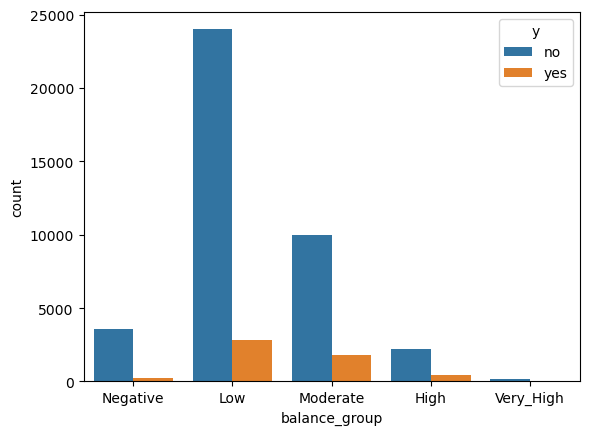

In [48]:
sns.countplot(data=df,x='balance_group',hue='y',order=['Negative','Low','Moderate','High','Very_High'])

In [49]:
def balance_category(df):
    balance_groups  = df.balance_group.unique() #array
    for i in balance_groups:
        total = len(df[df['balance_group']== i])
        total_yes = len(df[(df['balance_group']==i) & (df['y']=='yes')])
        total_no = len(df[(df['balance_group']==i) & (df['y']=='no')])
        print(f"The percentage of customers with balance group "+ '\033[1m' +f"{i}" + '\033[0m'+ f", Yes:{(total_yes*100)/total:.2f}%, No:{(total_no*100)/total:.2f}%")
        print()
balance_category(df)

The percentage of customers with balance group Moderate, Yes:15.33%, No:84.67%

The percentage of customers with balance group Low, Yes:10.56%, No:89.44%

The percentage of customers with balance group Negative, Yes:5.58%, No:94.42%

The percentage of customers with balance group High, Yes:15.54%, No:84.46%

The percentage of customers with balance group Very_High, Yes:15.03%, No:84.97%



- Customers with low balances (0-1000 euros) were contacted the most, and the highest number of customers within this balance group subscribed to the term deposit.
- Among the customers contacted with various balance groups, those in the Moderate, High, and Very High balance groups exhibited the highest percentage of term deposit subscriptions.

### Adding p_contacts feature extracted from the "previous" column

In [50]:
conditions = [(df.previous==0),((df.previous>=1)&(df.previous<11)),(df.previous>10)]
choices = [0,1,2]
df['p_contacts'] =  np.select(conditions,choices) 
#number of contacts performed before this campaign and for this client (numeric)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,loan_no_loan,age_group,balance_group,p_contacts
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,3,Middle_age,Moderate,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,3,Adult,Low,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,4,Adult,Low,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,3,Middle_age,Moderate,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,1,Adult,Low,0


### Adding call_duration feature extracted from the "duration" column

In [51]:
conditions = [(df.duration<=60),((df.duration>60)&(df.duration<250)),((df.duration>=250)&(df.duration<1000)),(df.duration>=1000)]
choices = ['Short','Average','Medium_Long','Long']
df['call_duration'] =  np.select(conditions,choices)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,loan_no_loan,age_group,balance_group,p_contacts,call_duration
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,3,Middle_age,Moderate,0,Medium_Long
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,3,Adult,Low,0,Average
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,4,Adult,Low,0,Average
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,3,Middle_age,Moderate,0,Average
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,1,Adult,Low,0,Average


## Dropping columns

In [52]:
dff = df.drop(['age','balance','housing','loan','pdays','previous','duration','day'],axis=1)
dff = dff[['age_group','marital','job','education','balance_group','default','loan_no_loan','contact','p_contacts','poutcome','month','call_duration','campaign','y']]
dff.head()

,age_group,marital,job,education,balance_group,default,loan_no_loan,contact,p_contacts,poutcome,month,call_duration,campaign,y
0,Middle_age,married,management,tertiary,Moderate,no,3,unknown,0,unknown,may,Medium_Long,1,no
1,Adult,single,technician,secondary,Low,no,3,unknown,0,unknown,may,Average,1,no
2,Adult,married,entrepreneur,secondary,Low,no,4,unknown,0,unknown,may,Average,1,no
3,Middle_age,married,blue-collar,unknown,Moderate,no,3,unknown,0,unknown,may,Average,1,no
4,Adult,single,unknown,unknown,Low,no,1,unknown,0,unknown,may,Average,1,no


# Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dff.job = le.fit_transform(dff.job)
dff.marital = dff.marital.map({'single':1,'married':2,'divorced':3})
dff.education = dff.education.map({'primary':0,'secondary':1,'tertiary':2,'unknown':3})
dff.default = dff.default.map({'no':0,'yes':1})
dff.contact = dff.contact.map({'unknown':0,'cellular':1,'telephone':2})
dff.month = dff.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
dff.balance_group = dff.balance_group.map({'Negative':0,'Low':1,'Moderate':2,'High':3,'Very_High':4})
dff.campaign = np.select([dff.campaign<=2,dff.campaign>2],[1,2])
dff.poutcome = dff.poutcome.map({'failure':0,'success':1,'other':2,'unknown':3})
dff.y = dff.y.map({'no':0,'yes':1})
dff.age_group = dff.age_group.map({'Young_adult':0,'Adult':1,'Middle_age':2,'Old_age':3})
dff.call_duration = dff.call_duration.map({'Short':0,'Average':1,'Medium_Long':2,'Long':3})
dff.head()

,age_group,marital,job,education,balance_group,default,loan_no_loan,contact,p_contacts,poutcome,month,call_duration,campaign,y
0,2,2,4,2,2,0,3,0,0,3,5,2,1,0
1,1,1,9,1,1,0,3,0,0,3,5,1,1,0
2,1,2,2,1,1,0,4,0,0,3,5,1,1,0
3,2,2,1,3,2,0,3,0,0,3,5,1,1,0
4,1,1,11,3,1,0,1,0,0,3,5,1,1,0


In [54]:
dff.shape

(45211, 14)

In [55]:
dff.nunique()

age_group         4
marital           3
job              12
education         4
balance_group     5
default           2
loan_no_loan      4
contact           3
p_contacts        3
poutcome          4
month            12
call_duration     4
campaign          2
y                 2
dtype: int64

In [56]:
cols = dff.select_dtypes('int').columns

In [57]:
dff[cols] = dff[cols].astype('object')

In [58]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age_group      45211 non-null  object
 1   marital        45211 non-null  object
 2   job            45211 non-null  object
 3   education      45211 non-null  object
 4   balance_group  45211 non-null  object
 5   default        45211 non-null  object
 6   loan_no_loan   45211 non-null  object
 7   contact        45211 non-null  object
 8   p_contacts     45211 non-null  object
 9   poutcome       45211 non-null  object
 10  month          45211 non-null  object
 11  call_duration  45211 non-null  object
 12  campaign       45211 non-null  object
 13  y              45211 non-null  object
dtypes: object(14)
memory usage: 4.8+ MB


In [59]:
dff.describe(include='object')

,age_group,marital,job,education,balance_group,default,loan_no_loan,contact,p_contacts,poutcome,month,call_duration,campaign,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,4,3,12,4,5,2,4,3,3,4,12,4,2,2
top,1,2,1,1,1,0,3,1,0,3,5,1,1,0
freq,28211,27214,9732,23202,26814,44396,20763,29285,36954,36959,13766,24683,30049,39922


# Model Selection

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

## Splitting dataset

In [61]:
X = dff.drop('y',axis=1)
Y = dff.y
Y = Y.astype('int')

In [63]:
Y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

## Oversampling

In [64]:
sm = SMOTE(random_state=30)
X_new,y_new =sm.fit_resample(X,Y) #oversampling

In [65]:
X_train,X_test, y_train, y_test = train_test_split(X_new,y_new,test_size =0.33,random_state=30)

In [66]:
y_train.value_counts()

y
1    26852
0    26643
Name: count, dtype: int64

In [67]:
y_test.value_counts()

y
0    13279
1    13070
Name: count, dtype: int64

## Logistic Regression Model

In [68]:
#Instantiating and fitting the model to training Dataset
log_reg = LogisticRegression(random_state=30)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=30)

In [69]:
# prediction
y_pred=log_reg.predict(X_test)

In [70]:
difference=pd.DataFrame(y_test-y_pred)
difference.value_counts()

y 
 0    20272
-1     3210
 1     2867
Name: count, dtype: int64

In [71]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[10069,  3210],
       [ 2867, 10203]], dtype=int64)

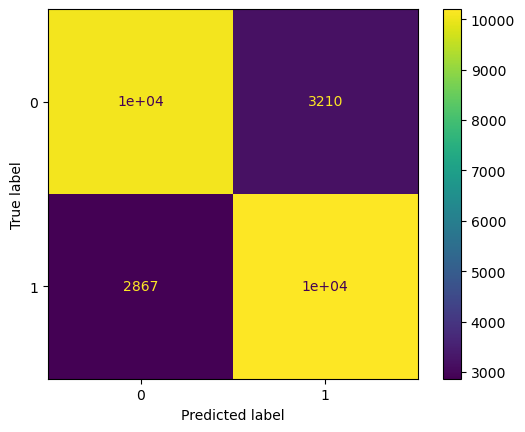

In [72]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

In [73]:
# classification report
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     13279
           1       0.76      0.78      0.77     13070

    accuracy                           0.77     26349
   macro avg       0.77      0.77      0.77     26349
weighted avg       0.77      0.77      0.77     26349



In [74]:
# accuracy
metrics.accuracy_score(y_test,y_pred)

0.7693650612926487

In [75]:
# precision
metrics.precision_score(y_test,y_pred)

0.7606799373741893

In [76]:
# recall
metrics.recall_score(y_test,y_pred)

0.7806426931905126

In [77]:
metrics.f1_score(y_test,y_pred)

0.7705320394215157

In [78]:
# prob of target var
y_pred_prob=log_reg.predict_proba(X_test)
y_pred_prob[:,1]

array([0.26549712, 0.84154404, 0.70036129, ..., 0.10803188, 0.22709222,
       0.54712295])

In [79]:
# auc

y_pred_prob=y_pred_prob[:,1]  #y_pred_prob=log_reg.predict_proba(x_test)[::,1]
auc=metrics.roc_auc_score(y_test,y_pred_prob)
auc

0.853765484940267

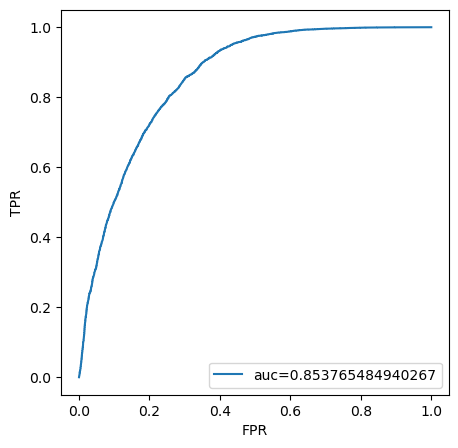

In [80]:
# roc plot

y_pred_prob=log_reg.predict_proba(X_test)[::,1]


fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)
auc=metrics.roc_auc_score(y_test,y_pred_prob)

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
#TPR>FPR

## Decision Tree Model

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
from sklearn.model_selection import GridSearchCV

In [98]:
dt_1 = DecisionTreeClassifier(random_state=32)
param_grid_dt_1 = {'criterion':['gini', 'entropy'],
                 'min_samples_split':[2,4,6,7,8]
                 ,'max_depth':[5,10,15,20,25]
                }

gsv_dt_1 = GridSearchCV(dt_1,param_grid=param_grid_dt_1,scoring='f1',cv=10)

In [99]:
gsv_dt_1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=32),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_split': [2, 4, 6, 7, 8]},
             scoring='f1')

In [100]:
gsv_dt_1.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 2}

In [101]:
ypred_dt_1 = gsv_dt_1.predict(X=X_test)

In [102]:
print(classification_report(y_true= y_test , y_pred=ypred_dt_1))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     13279
           1       0.89      0.91      0.90     13070

    accuracy                           0.90     26349
   macro avg       0.90      0.90      0.90     26349
weighted avg       0.90      0.90      0.90     26349



## Random Forest Model

In [103]:
from sklearn.ensemble import RandomForestClassifier
fit_rf=RandomForestClassifier(random_state=10)

In [104]:
param_dist={'max_depth':[2,3,4,6,8,10,12],
           'criterion':['gini','entropy'],
           'n_estimators':[5,10,15,20,25,30]}

cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist,scoring='f1')

cv_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 8, 10, 12],
                         'n_estimators': [5, 10, 15, 20, 25, 30]},
             scoring='f1')

In [105]:
cv_rf.best_params_

{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 30}

In [106]:
from sklearn.metrics import accuracy_score

In [111]:
y_pred_train=cv_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train,y_pred_train)
accuracy_rf_train

0.9000654266753902

In [107]:
y_pred=cv_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred)
accuracy_rf

0.8850810277429884

In [108]:
print(classification_report( y_test , y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     13279
           1       0.85      0.93      0.89     13070

    accuracy                           0.89     26349
   macro avg       0.89      0.89      0.88     26349
weighted avg       0.89      0.89      0.88     26349



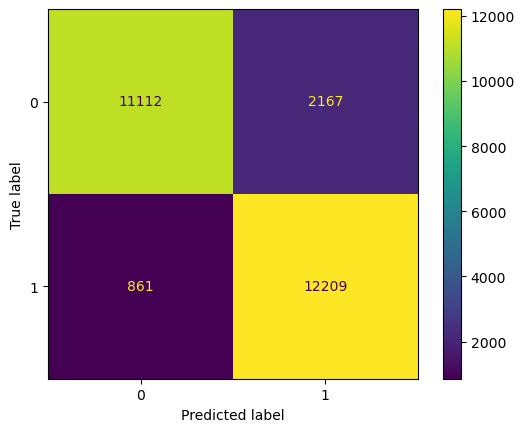

In [110]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## SVM

In [112]:
from sklearn.svm import SVC     
from sklearn import metrics    
svc = SVC(random_state = 5)
svc.fit(X_train,y_train)

SVC(random_state=5)

In [113]:
y_pred = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8042809973813048


In [114]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79     13279
           1       0.77      0.87      0.81     13070

    accuracy                           0.80     26349
   macro avg       0.81      0.80      0.80     26349
weighted avg       0.81      0.80      0.80     26349



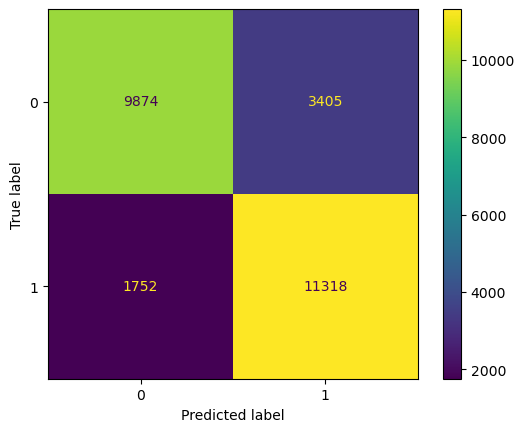

In [115]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

error = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=5)
    error.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

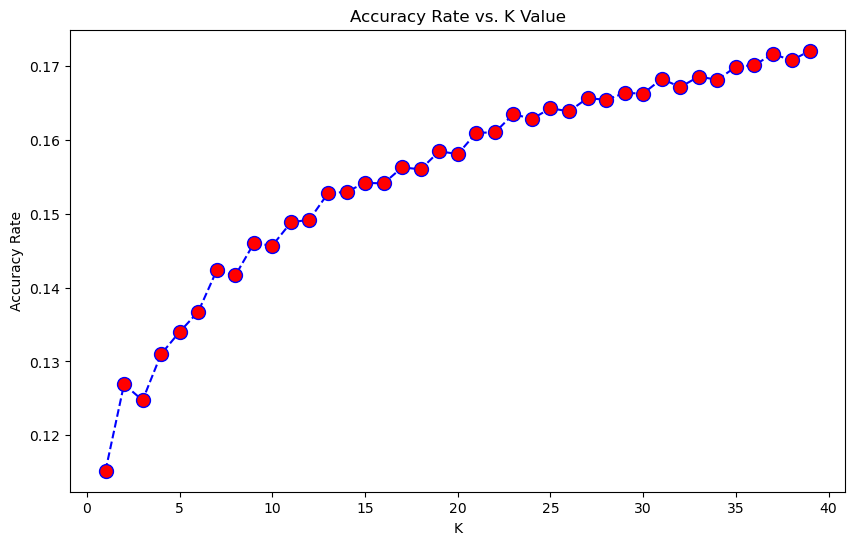

In [117]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [118]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=14


[[10521  2758]
 [ 1027 12043]]


              precision    recall  f1-score   support

           0       0.91      0.79      0.85     13279
           1       0.81      0.92      0.86     13070

    accuracy                           0.86     26349
   macro avg       0.86      0.86      0.86     26349
weighted avg       0.86      0.86      0.86     26349



## Gaussian Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_test_predict = classifier.predict(X_test)
y_train_predict = classifier.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73     13279
           1       0.71      0.83      0.77     13070

    accuracy                           0.75     26349
   macro avg       0.76      0.75      0.75     26349
weighted avg       0.76      0.75      0.75     26349

              precision    recall  f1-score   support

           0       0.80      0.67      0.73     26643
           1       0.72      0.83      0.77     26852

    accuracy                           0.75     53495
   macro avg       0.76      0.75      0.75     53495
weighted avg       0.76      0.75      0.75     53495



# Results

The table bellow describe the accuracy values we reached with the proposed model. 

In [138]:
data = {'Logistic Regression':77,'Decision Tree':90,'Random Forest':89,'SVM':80,'KNN':86,'Naive Bayes':75}
df = pd.DataFrame(data.items(),columns=['Model Name','Accuracy'])
def highlight_decision_tree_row(row):
    if row['Model Name'] == 'Decision Tree':
        return ['background-color: yellow'] * len(row)
    else:
        return [''] * len(row)

# Apply the styling function to the DataFrame
new_df = df.style.apply(highlight_decision_tree_row, axis=1)

# Display the styled DataFrame
new_df


,Model Name,Accuracy
0,Logistic Regression,77
1,Decision Tree,90
2,Random Forest,89
3,SVM,80
4,KNN,86
5,Naive Bayes,75
